### Importación de datos



In [5]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
# Ingreso total de la tienda
ingreso_t1 = tienda1['Precio'].sum()
ingreso_t2 = tienda2['Precio'].sum()
ingreso_t3 = tienda3['Precio'].sum()
ingreso_t4 = tienda4['Precio'].sum()
print(ingreso_t1, ingreso_t2, ingreso_t3, ingreso_t4)

1150880400.0 1116343500.0 1098019600.0 1038375700.0


In [7]:
Ingreso_Tiendas = [ingreso_t1,ingreso_t2,ingreso_t3,ingreso_t4]
Tiendas = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']

pd.set_option('display.float_format', '{:,.0f}'.format)

df_ingresos = pd.DataFrame({
    'Tienda': Tiendas,
    'Ingreso': Ingreso_Tiendas
})
df_ingresos

,Tienda,Ingreso
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


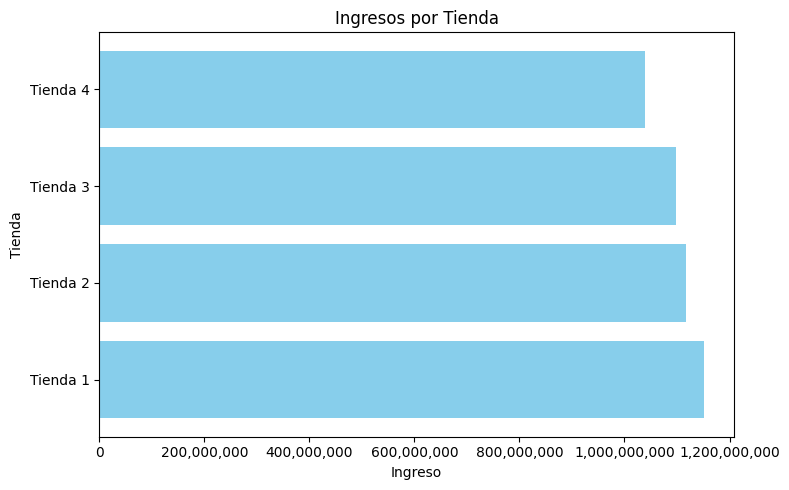

In [8]:
import matplotlib.ticker as mtick

def grafico_ingresos(df_ingresos):
  plt.figure(figsize=(8, 5))
  plt.barh(df_ingresos['Tienda'], df_ingresos['Ingreso'], color='skyblue')
  plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Formato con comas
  plt.title('Ingresos por Tienda')
  plt.xlabel('Ingreso')
  plt.ylabel('Tienda')
  plt.tight_layout()
  plt.show()

grafico_ingresos(df_ingresos)


# 2. Ventas por categoría

In [9]:
# Contar cuántos productos se vendieron por categoría
ventas_categoria_t1 = tienda1['Categoría del Producto'].value_counts()
ventas_categoria_t2 = tienda2['Categoría del Producto'].value_counts()
ventas_categoria_t3 = tienda3['Categoría del Producto'].value_counts()
ventas_categoria_t4 = tienda4['Categoría del Producto'].value_counts()
# Mostrar los resultados
print(ventas_categoria_t1)
print(ventas_categoria_t2)
print(ventas_categoria_t3)
print(ventas_categoria_t4)

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                

In [10]:
df_categoria_t1 = ventas_categoria_t1.reset_index()
df_categoria_t2 = ventas_categoria_t2.reset_index()
df_categoria_t3 = ventas_categoria_t3.reset_index()
df_categoria_t4 = ventas_categoria_t4.reset_index()
df_categoria_t1.columns = ['Categoría', 'Cantidad_Vendida']
df_categoria_t2.columns = ['Categoría', 'Cantidad_Vendida']
df_categoria_t3.columns = ['Categoría', 'Cantidad_Vendida']
df_categoria_t4.columns = ['Categoría', 'Cantidad_Vendida']
print(df_categoria_t1)


                 Categoría  Cantidad_Vendida
0                  Muebles               465
1             Electrónicos               448
2                 Juguetes               324
3        Electrodomésticos               312
4     Deportes y diversión               284
5   Instrumentos musicales               182
6                   Libros               173
7  Artículos para el hogar               171


In [11]:
print(df_categoria_t2)

                 Categoría  Cantidad_Vendida
0                  Muebles               442
1             Electrónicos               422
2                 Juguetes               313
3        Electrodomésticos               305
4     Deportes y diversión               275
5   Instrumentos musicales               224
6                   Libros               197
7  Artículos para el hogar               181


In [12]:
print(df_categoria_t3)

                 Categoría  Cantidad_Vendida
0                  Muebles               499
1             Electrónicos               451
2                 Juguetes               315
3        Electrodomésticos               278
4     Deportes y diversión               277
5                   Libros               185
6   Instrumentos musicales               177
7  Artículos para el hogar               177


In [13]:
print(df_categoria_t4)

                 Categoría  Cantidad_Vendida
0                  Muebles               480
1             Electrónicos               451
2                 Juguetes               338
3     Deportes y diversión               277
4        Electrodomésticos               254
5  Artículos para el hogar               201
6                   Libros               187
7   Instrumentos musicales               170


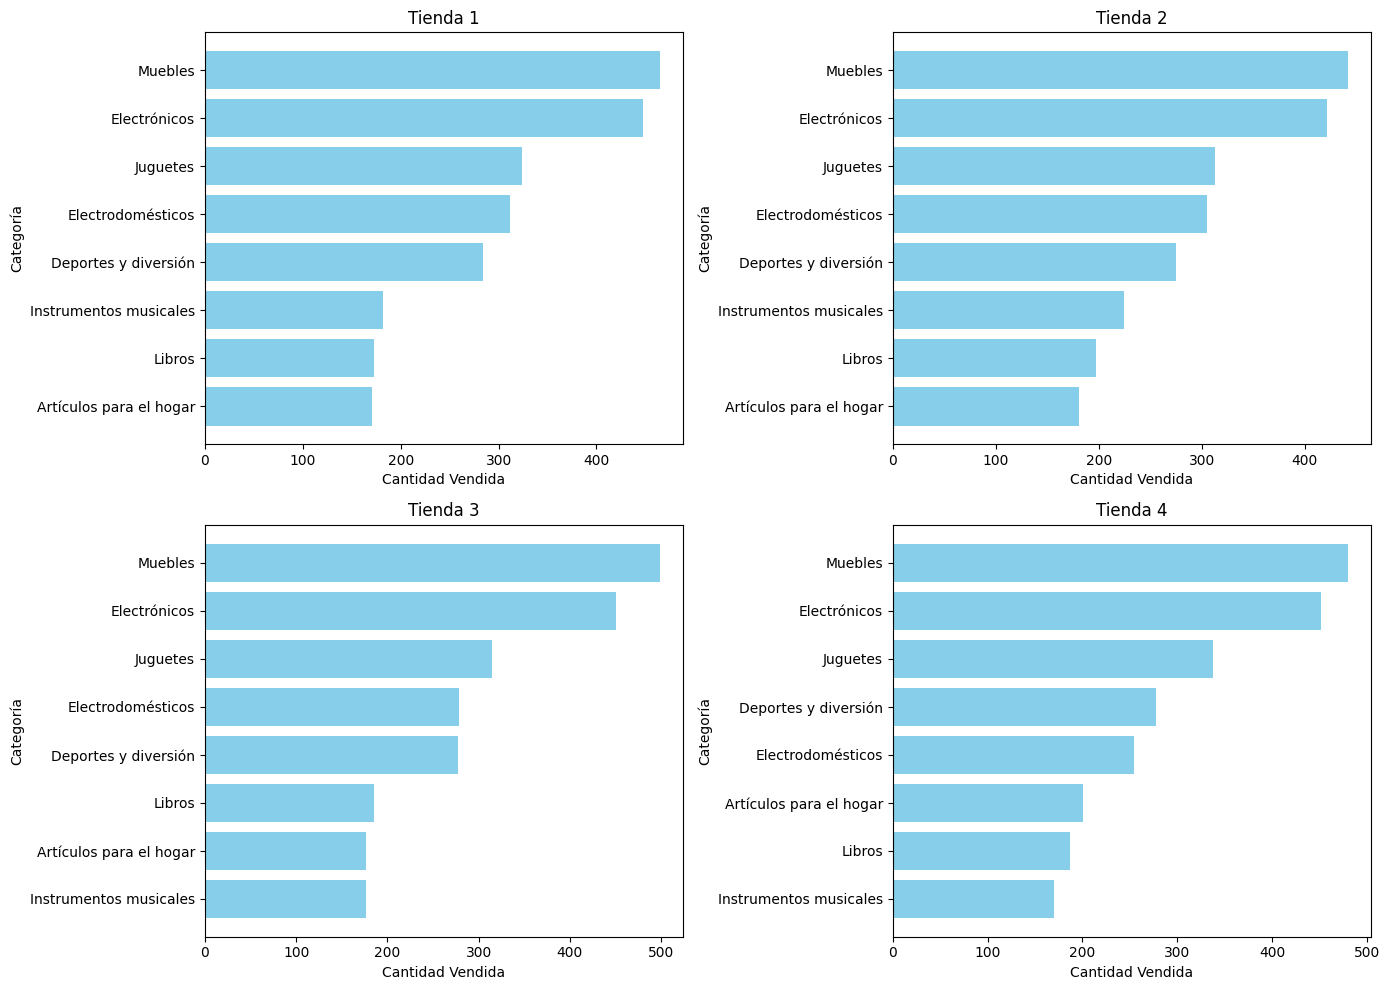

In [22]:
dataframes_categorias = [df_categoria_t1,df_categoria_t2,df_categoria_t3,df_categoria_t4]
titulos = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']


def grafico_categoria(dataframes_categorias):
  fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 filas x 2 columnas
  axs = axs.flatten()  # Aplanamos para poder usar un solo índice

  for i, (df, titulo) in enumerate(zip(dataframes_categorias, titulos)):
      df_ordenado = df.sort_values(by='Cantidad_Vendida', ascending=True)
      axs[i].barh(df_ordenado['Categoría'], df_ordenado['Cantidad_Vendida'], color='skyblue')
      axs[i].set_title(titulo)
      axs[i].set_xlabel('Cantidad Vendida')
      axs[i].set_ylabel('Categoría')

  plt.tight_layout()
  plt.show()

grafico_categoria(dataframes_categorias)

# 3. Calificación promedio de la tienda


In [25]:
calificacion_t1 = tienda1['Calificación'].mean()
calificacion_t2 = tienda2['Calificación'].mean()
calificacion_t3 = tienda3['Calificación'].mean()
calificacion_t4 = tienda4['Calificación'].mean()

def calificaciones_tiendas():
  print(f"Calificación promedio tienda 1: {calificacion_t1:.2f}")
  print(f"Calificación promedio tienda 2: {calificacion_t2:.2f}")
  print(f"Calificación promedio tienda 3: {calificacion_t3:.2f}")
  print(f"Calificación promedio tienda 4: {calificacion_t4:.2f}")

calificaciones_tiendas()

Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00


# 4. Productos más y menos vendidos

In [16]:
# Contar cuántos productos se vendieron mas y menos
productos_t1 = tienda1['Producto']. value_counts ()
productos_t2 = tienda2['Producto']. value_counts ()
productos_t3 = tienda3 ['Producto']. value_counts ()
productos_t4 = tienda4 ['Producto']. value_counts ()
# Crear frames
productos_t1 = productos_t1.reset_index()
productos_t2 = productos_t2.reset_index()
productos_t3 = productos_t3.reset_index()
productos_t4 = productos_t4.reset_index()
productos_t1.columns = ['Producto','Cantidad vendida']
productos_t2.columns = ['Producto','Cantidad vendida']
productos_t3.columns = ['Producto','Cantidad vendida']
productos_t4.columns = ['Producto','Cantidad vendida']


In [17]:
productos_t1

,Producto,Cantidad vendida
0,Microondas,60
1,TV LED UHD 4K,60
2,Armario,60
3,Secadora de ropa,58
4,Mesa de noche,56
5,Bloques de construcción,56
6,Balón de baloncesto,55
7,Bicicleta,54
8,Vaso térmico,54
9,Refrigerador,54


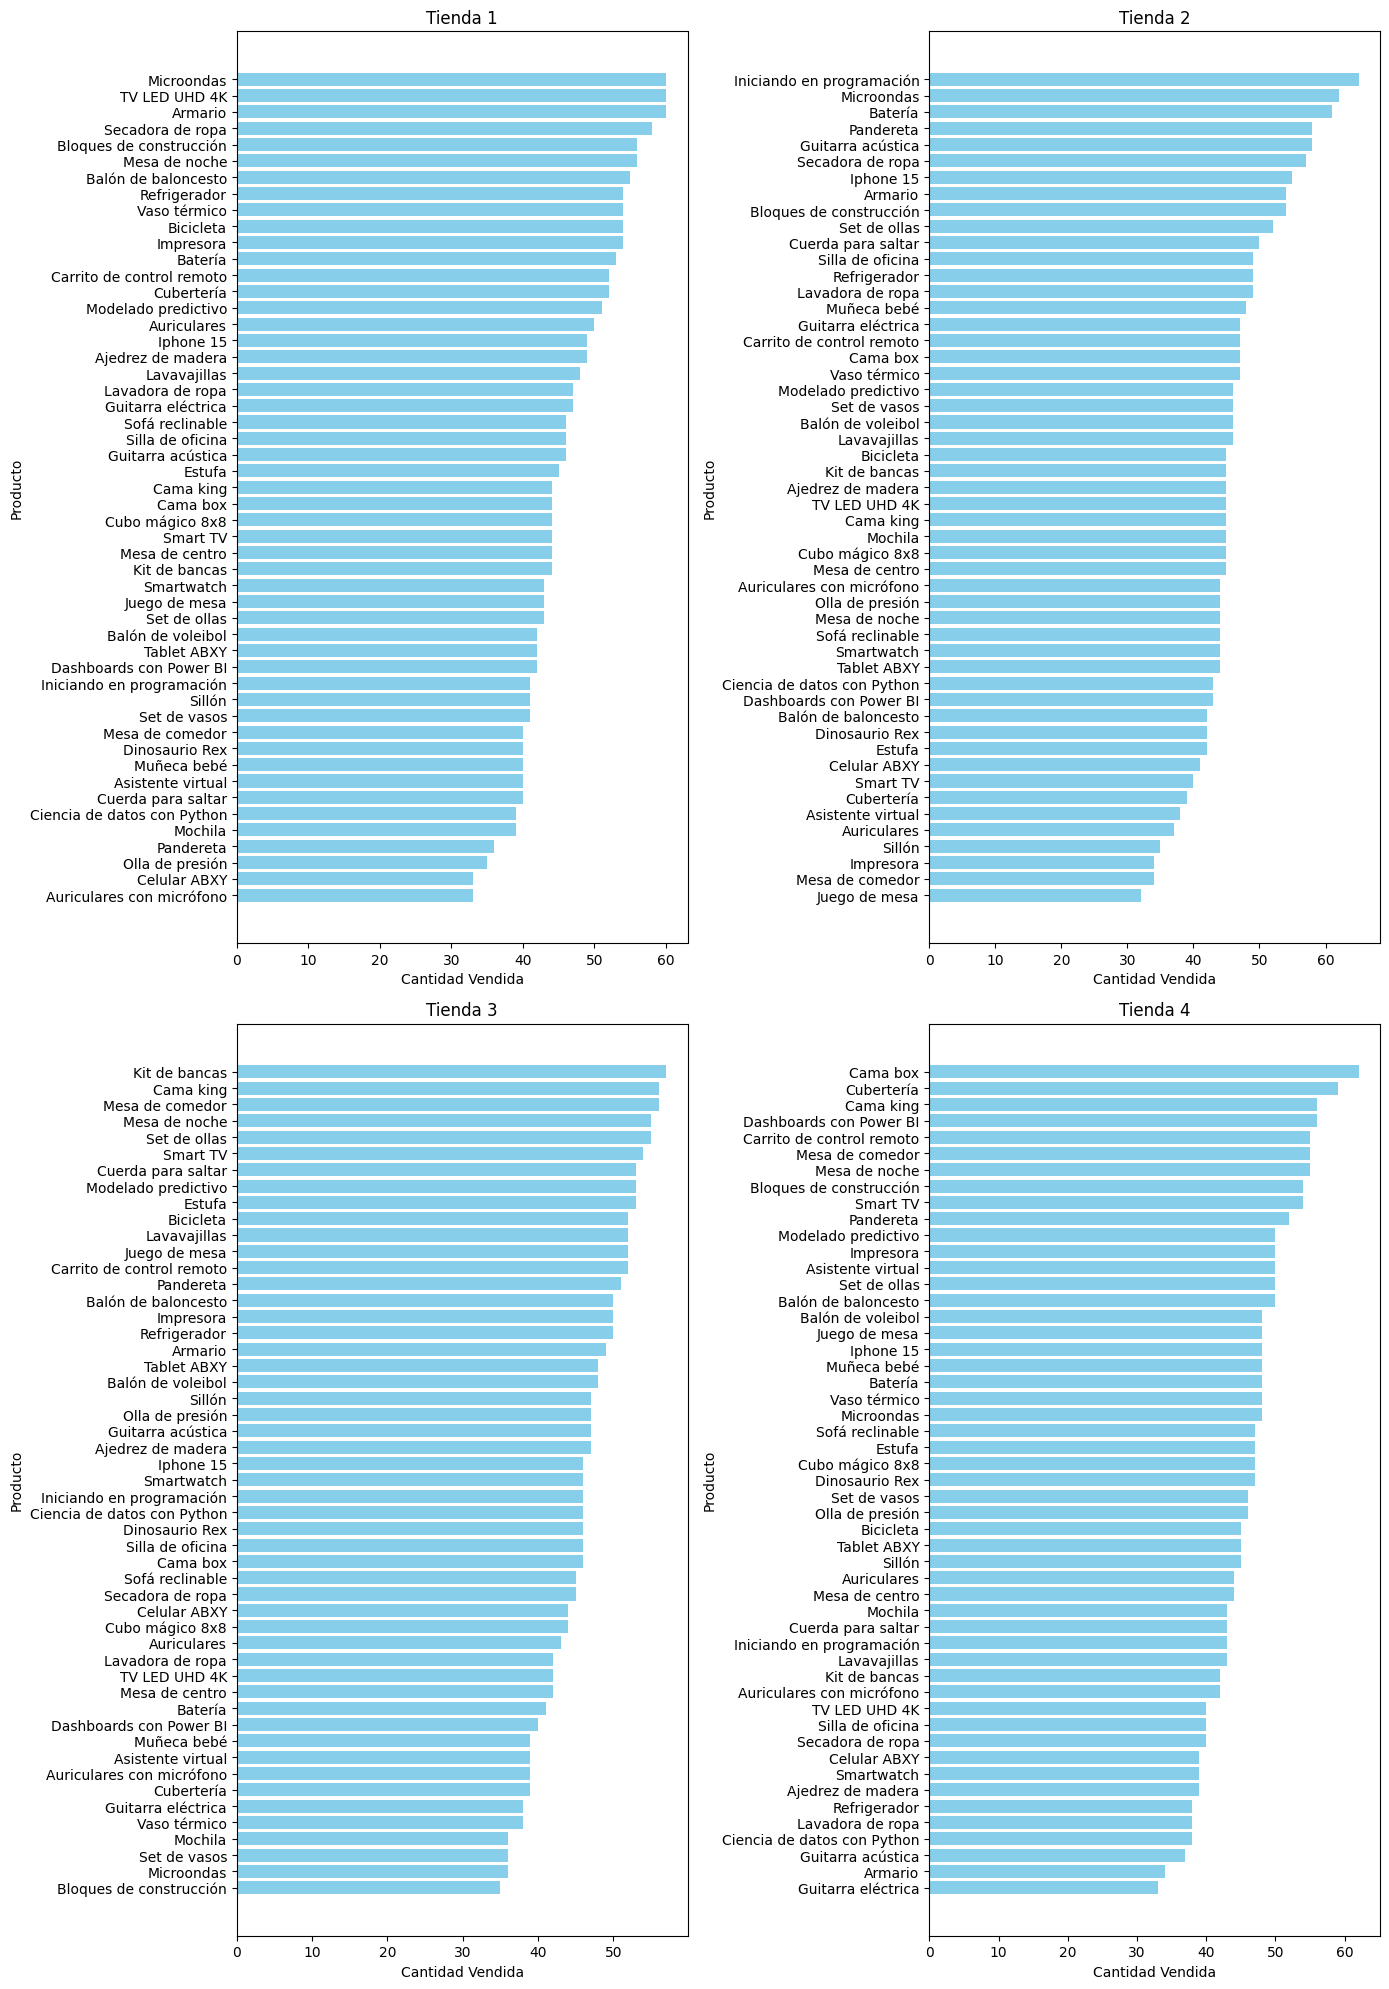

In [27]:
dataframes_producto = [productos_t1, productos_t2, productos_t3, productos_t4]

def grafico_productos(dataframes_producto):
  fig, axs = plt.subplots(2, 2, figsize=(14, 20))  # 2 filas, 2 columnas
  axs = axs.flatten()  # Para poder recorrer fácilmente con un solo índice

  for i, (df, titulo) in enumerate(zip(dataframes_producto, titulos)):
      df_orden = df.sort_values(by='Cantidad vendida', ascending=True)

      axs[i].barh(df_orden['Producto'], df_orden['Cantidad vendida'], color='skyblue')
      axs[i].set_title(titulo)
      axs[i].set_xlabel('Cantidad Vendida')
      axs[i].set_ylabel('Producto')
      axs[i].xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Separador de miles

  plt.tight_layout()
  plt.show()

grafico_productos(dataframes_producto)

# 5. Envío promedio por tienda

In [29]:
envio_t1 = tienda1['Costo de envío'].mean()
envio_t2 = tienda2['Costo de envío'].mean()
envio_t3 = tienda3['Costo de envío'].mean()
envio_t4 = tienda4['Costo de envío'].mean()

def envio_tiendas():
  print(f"Costo de envio promedio tienda 1: {envio_t1:.2f}")
  print(f"Costo de envio promedio tienda 2: {envio_t2:.2f}")
  print(f"Costo de envio promedio tienda 3: {envio_t3:.2f}")
  print(f"Costo de envio promedio tienda 4: {envio_t4:.2f}")

envio_tiendas()

Costo de envio promedio tienda 1: 26018.61
Costo de envio promedio tienda 2: 25216.24
Costo de envio promedio tienda 3: 24805.68
Costo de envio promedio tienda 4: 23459.46


# Informe Final

 El presente informe tiene como objetivo ayudar al Sr. Juan a tomar una decisión informada sobre a qué tienda debe vender sus productos, basándonos en un análisis integral de los datos disponibles. Se evaluaron distintas métricas clave, entre ellas: los ingresos totales por tienda, las categorías de productos más y menos vendidas, la calificación promedio otorgada por los clientes, el comportamiento de ventas por producto y el coste de envío promedio. A través de visualizaciones y estadísticas, se identificaron fortalezas y debilidades de cada tienda con el fin de recomendar la opción más conveniente.

## 1. Ingresos Totales por Tienda
Se compararon los ingresos totales de las cuatro tiendas. Las tiendas con mayores ingresos indican un mayor volumen de ventas o productos de mayor valor. Según los gráficos generados, Tienda 1 y Tienda 2 lideran en ingresos, mientras que Tienda 4 presenta el ingreso más bajo.

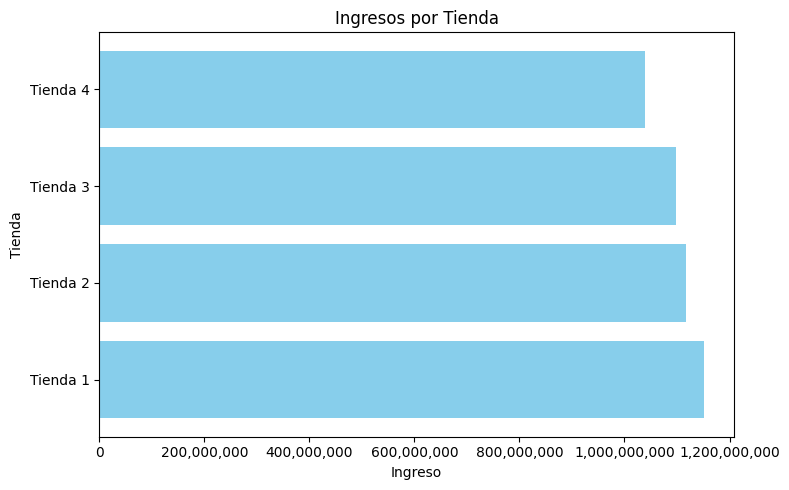

In [20]:
grafico_ingresos(df_ingresos)

## 2. Categorías de Productos
Las categorías de productos más vendidas en general fueron Electrónicos y Muebles, presentes en todas las tiendas. En contraste, Instrumentos musicales, Libros y Artículos para el hogar fueron las menos solicitadas. Esto sugiere que los productos del Sr. Juan tendrán mejor recepción si se alinean con las categorías populares de la tienda seleccionada.

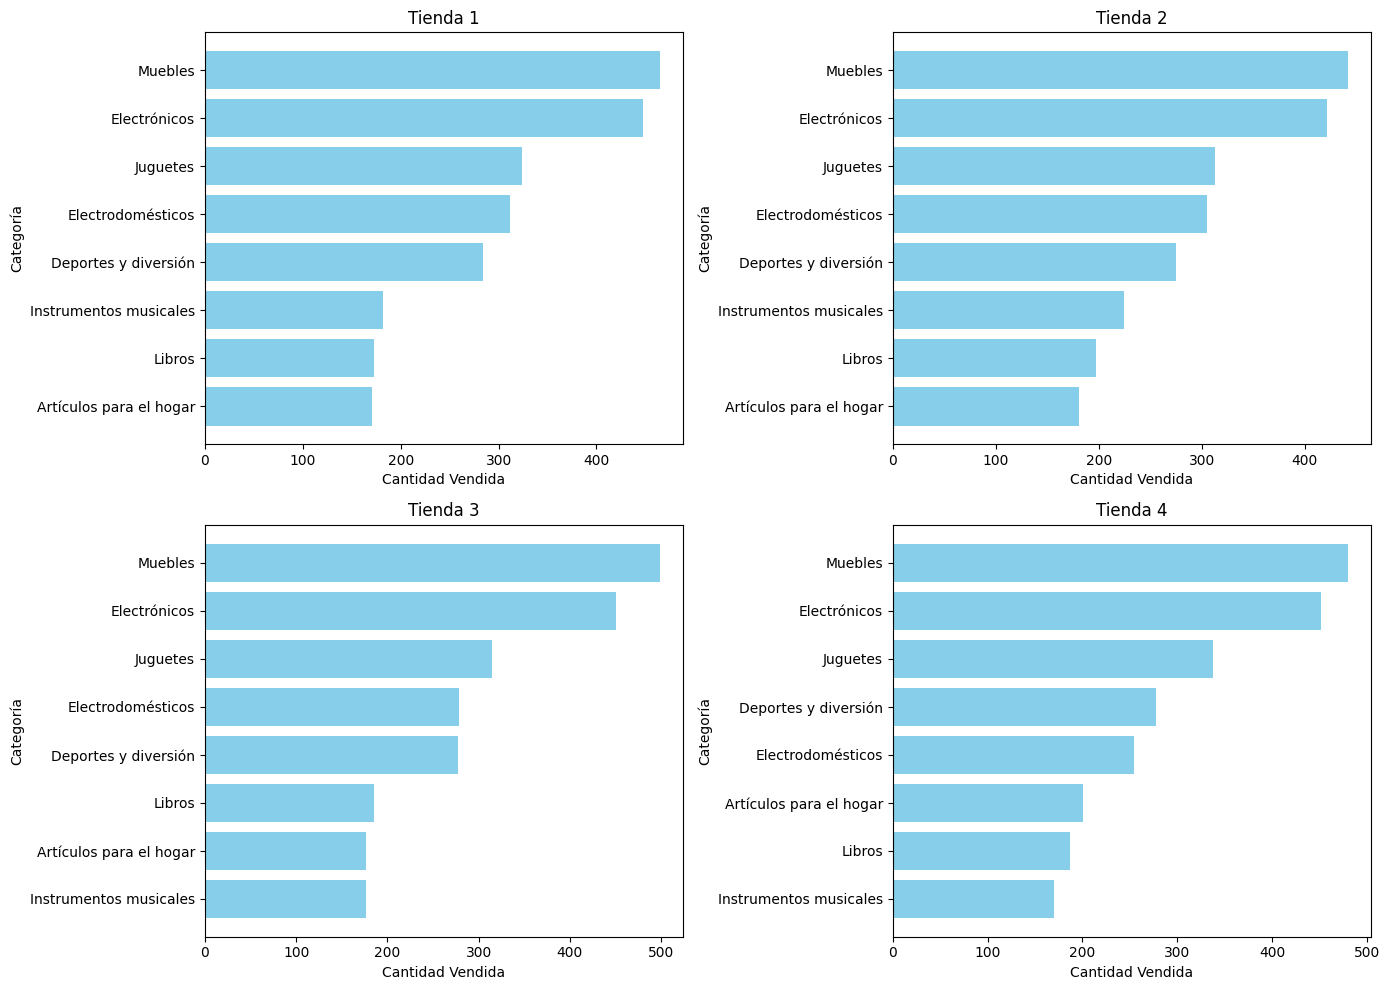

In [23]:
grafico_categoria(dataframes_categorias)

##3. Calificación Promedio por Tienda
Se analizaron las calificaciones de los clientes para evaluar la satisfacción general y la reputación de cada tienda. Tienda 3 obtuvo la calificación promedio más alta, reflejando un buen nivel de atención, calidad y confianza del cliente. Por el contrario, Tienda 1 mostró las calificaciones más bajas, lo cual puede afectar negativamente la percepción del producto del Sr. Juan. Sin embargo si revisamos los datos nos daremos cuenta que la diferencia en calificacion es mínima en todas las sucursales, por lo que habría que revisar mas a detalle los elemntos que pueden mejorar de forma general para aumnetar las calificaciones de las tiendas



In [26]:
calificaciones_tiendas()

Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00


##4. Productos Más y Menos Vendidos
Los productos más vendidos coinciden con las categorías líderes, lo que refuerza la demanda de ciertos artículos. El análisis también permitió identificar productos con bajo movimiento, lo que es clave para evitar introducir artículos poco rentables.

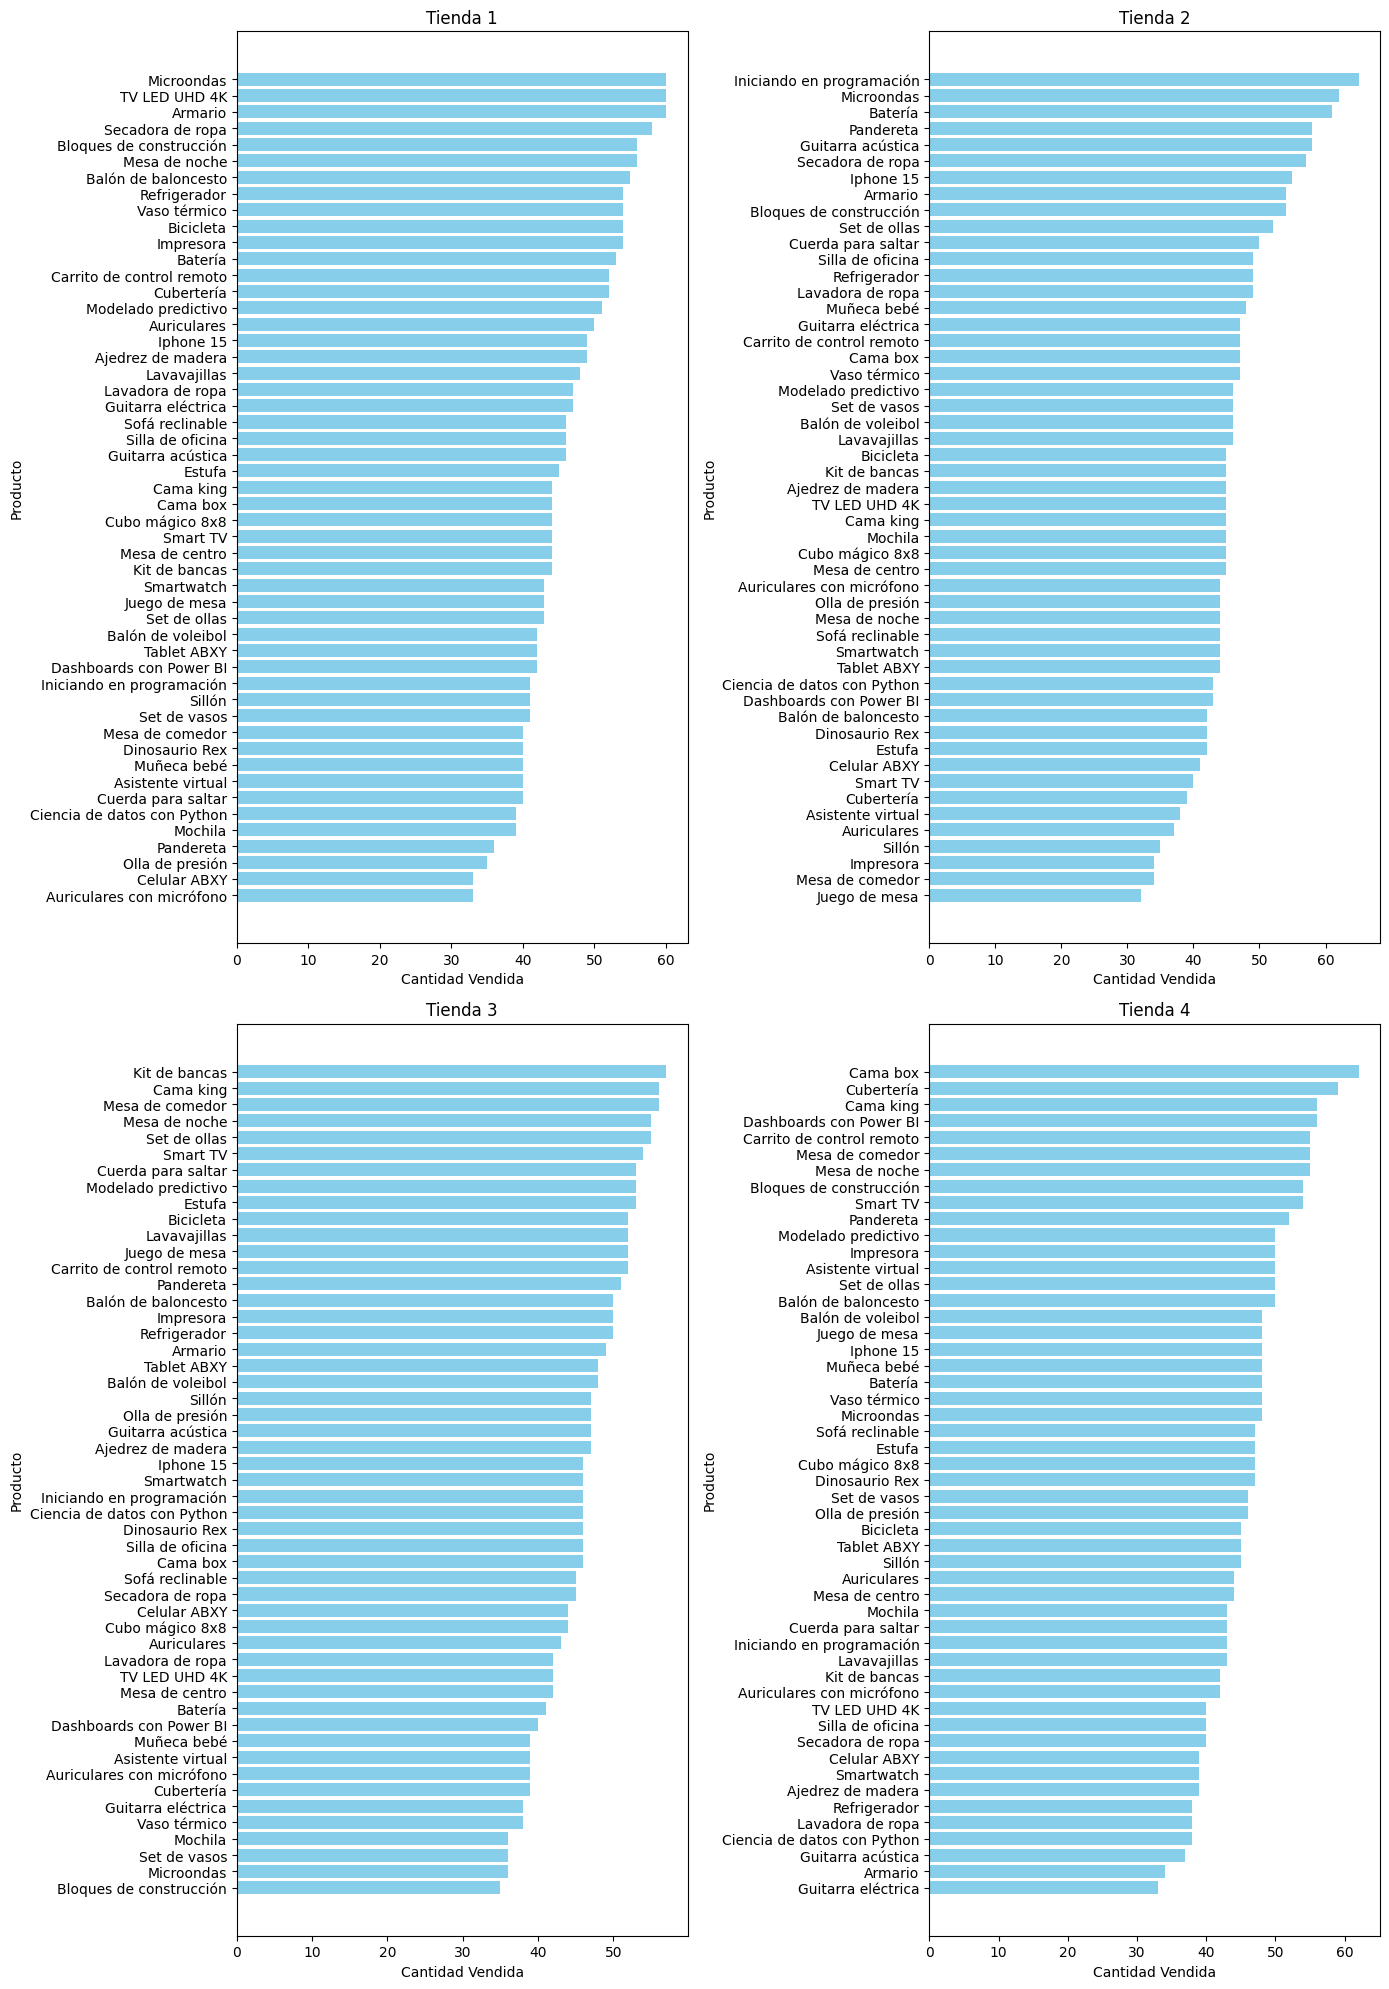

In [28]:
grafico_productos(dataframes_producto)

##5. Coste de Envío Promedio
Un análisis comparativo del coste de envío por tienda mostró que Tienda 3 y Tienda 4 ofrecen los costes de envío más bajos en promedio. Esto es una ventaja competitiva tanto para el vendedor como para el consumidor final, al reducir el precio total percibido del producto.

In [30]:
envio_tiendas()

Costo de envio promedio tienda 1: 26018.61
Costo de envio promedio tienda 2: 25216.24
Costo de envio promedio tienda 3: 24805.68
Costo de envio promedio tienda 4: 23459.46


##Conclusión y recomendación
Tras realizar un análisis integral de las cuatro tiendas, considerando variables clave como los ingresos totales, categorías más y menos vendidas, calificaciones promedio de los clientes, productos más y menos vendidos y el coste de envío promedio, se identificó que Tienda 4 es la menos eficiente.

Tienda 4 presenta varias debilidades que la colocan en desventaja frente a las demás:

Ingresos totales más bajos, lo que sugiere menor volumen de ventas, pero si analizamos los categorias vendidad veremos que tiene casi las mismas ventas o incluso mayores que otras sucursales como la tienda 1,

Calificación promedio inferior, si bien no es la que tiene menor calificación es la segunda.

Costo de envío relativamente alto para la cantidad de ingresos que se tiene.

Estas debilidades hacen que la Tienda 4 no sea una opción viable para que el Sr. Juan venda sus productos, al ser la menos eficiente y la que requiere un gasto equivalente a las otras, sin tenere una buena satisfacciónd del cliente.

Por lo tanto, se recomienda descartar Tienda 4 como canal de venta. Entre las demás opciones, Tienda 1 se mantiene como la más sólida en cuanto a desempeño general, mientras que Tienda 2 y Tienda 3 también presentan fortalezas específicas que podrían ser consideradas según la estrategia del Sr. Juan.
